In [1]:
import numpy as np
import pandas as pd
import os

data_dir = os.listdir('./data')
print(data_dir)
train_set = pd.read_csv(f'./data/{data_dir[3]}')
test_set  = pd.read_csv(f'./data/{data_dir[1]}')

['.DS_Store', 'test.csv', 'test_img', 'train.csv', 'sample_submission.csv']


In [2]:
# Describing shape of data
print(f'Train Shape: {train_set.shape}\nTest Shape:  {test_set.shape}\n')
# Target labels 
target_tabels = list(np.sort(train_set.label.unique()))
print(f'Target Lables\n{target_tabels}\n')

Train Shape: (42000, 785)
Test Shape:  (28000, 784)

Target Lables
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



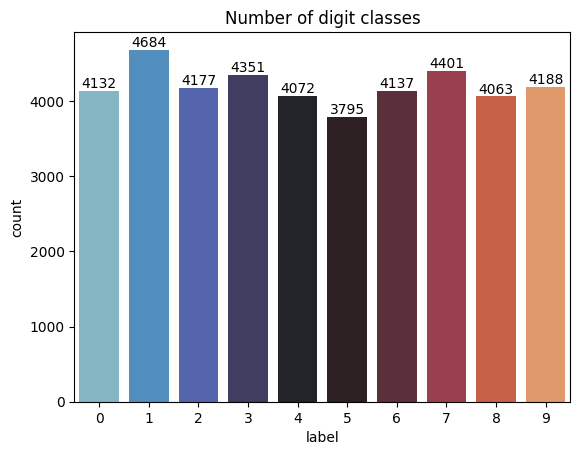

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(figure=(16,10))
g = sns.countplot(x = 'label', data=train_set, palette='icefire')
plt.title('Number of digit classes')
g.bar_label(g.containers[0])
plt.show()

Text(0.5, 1.0, '4')

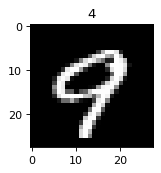

In [13]:
# four = train_set[train_set.label == 4].iloc[0, 1:]
four = train_set.iloc[100, 1:]
images = four.values.reshape(28,28)
plt.figure(figsize=(2,2), dpi=80)
plt.imshow(images, cmap='gray')
plt.title('4')

In [14]:
X = train_set.drop('label', axis=1).values
y = train_set['label'].values

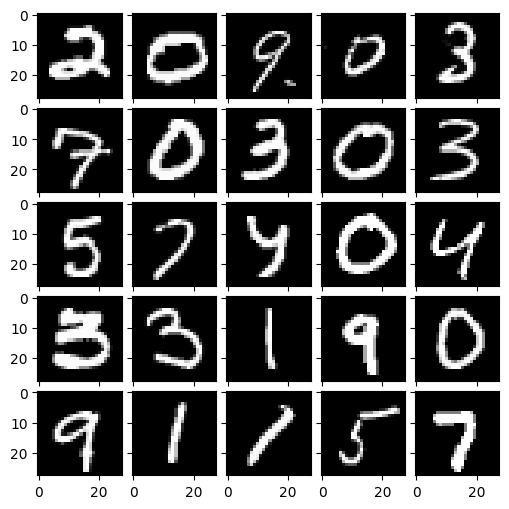

In [26]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(6,6))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(5,5),
                 axes_pad=0.1)

images = [test_set[i].reshape(28,28) for i in range(0,25)]

for ax, im in zip(grid, images):
    ax.imshow(im, cmap='gray')


In [15]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split

# X = normalize(X)
test_set = np.array(test_set)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.svm import SVC

svc = SVC(C= 10, kernel= 'rbf')
model = svc.fit(X_train, y_train)

In [26]:
import pickle

filename = 'mnist_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [30]:
from sklearn.model_selection import GridSearchCV
params = {'kernel': ['rbf'], 'C': [5, 8, 10]}

svc = SVC()
svc_search = GridSearchCV(svc, params, cv=3)
svc_search.fit(X_train[:8000], y_train[:8000])
svc_search.best_params_

{'C': 10, 'kernel': 'rbf'}

In [198]:
y_pred = model.predict(X_val)

In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy = accuracy_score(y_true=y_val, y_pred= y_pred)
accuracy

0.9798809523809524

[3]


Text(0.5, 1.0, '4')

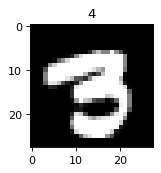

In [25]:
test_img = 356
final = model.predict(test_set[test_img].reshape(1, -1))
print(final)

four = test_set[test_img]
images = four.reshape(28,28)
plt.figure(figsize=(2,2), dpi=80)
plt.imshow(images, cmap='gray')
plt.title('4')

In [26]:
indexing = range(1, len(final)+1)
submission = pd.DataFrame({'ImageId':indexing, 'Label': final})
submission.to_csv('svm_digits.csv', index=False)

-------------------------------------

In [215]:
import cv2
import matplotlib.pyplot as plt

file = r"./data/test_img/4.jpg"
tst = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

img_resize = cv2.resize(tst, (28,28), interpolation=cv2.INTER_LINEAR)
img_resize = cv2.bitwise_not(img_resize)

np_img = normalize(img_resize)
# plt.imshow(img_resize, cmap='gray')

[4]


/Users/uw_admin/Documents/GitHub/Education-Tools/learn_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


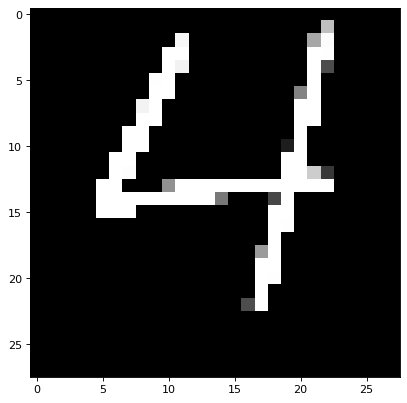

In [216]:

final = model.predict(img_resize.reshape(1, -1))
print(final)


images = img_resize.reshape(28,28)
plt.figure(figsize=(6,6), dpi=80)
plt.imshow(images, cmap='gray')